# Case Study 
* Understanding the effects of **Pruning** on model's Performance, Size and Accuracy.

**Pruning :- Its is one of the methods for inference to efficiently produce models smaller in size, more memory-efficient, more power-efficient and faster at inference with minimal loss in accuracy .**

*It is the tradeoff between accuracy and size that developers usually ready to do.*

### Table of Content :-
1) Model pruning on basic machine learning model.<br>
2) Model pruning on Neural network.<br>
3) Results 

* I will keep the model architecture, epochs, dataset and other hyperparameters same to keep the results balanced. The only change will be implementation of pruning.

## 1) Pruning on Machine Learning Model

* Classifier used :- Dicision Tree 
* Dataset Used :- Letter Recognition <a href='https://archive.ics.uci.edu/ml/datasets/Letter+Recognition'>Info about Data</a>
* Problem Type :- Multi-class Classification
* Target Class :- letter<br>

*This the basic form of pruning which is performed on decision tree by changing any of the hyperparameters.*<br>
*Sometimes basic model work better than deep NNs ,so it is good to understand them too.*

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
import joblib

from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#loading data
data = pd.read_csv('letter-recognition.csv')
data.shape

(20000, 17)

* There are 20,000 tuples and 17 attributes in this dataset.

In [ ]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


* Every data point is an integer.

In [ ]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


* No negative value in any attribute.
* Every attribute have same min. and max. value.

In [ ]:
letter_mean = data.groupby('letter').mean()
letter_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


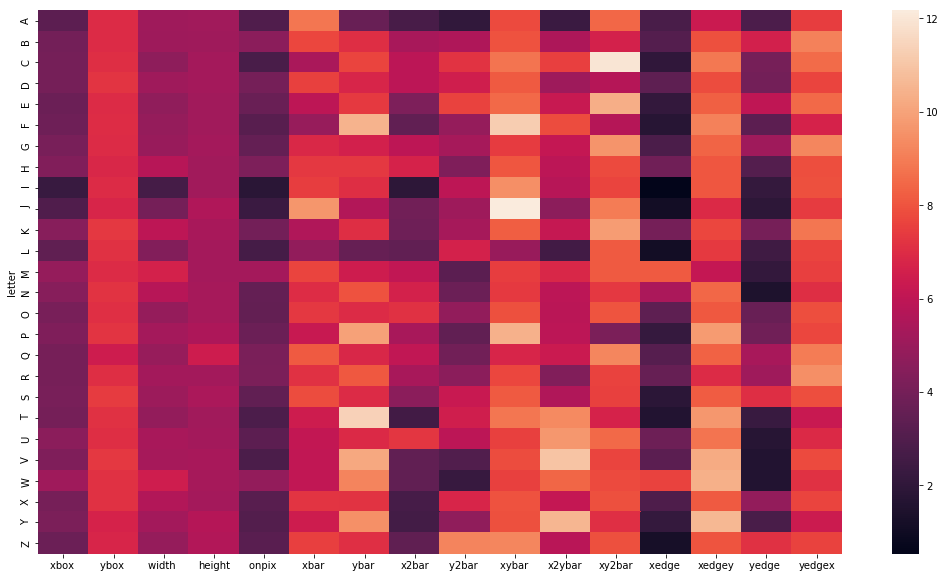

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(letter_means)

In [ ]:
val_count = data['letter'].value_counts()
val_count

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

Text(0,0.5,'Frequency')

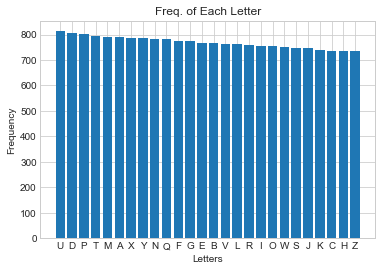

In [ ]:
fig, ax = plt.subplots() 

ax.bar(val_count.index, val_count.values) 
# setting title and labels 
ax.set_title('Freq. of Each Letter') 
ax.set_xlabel('Letters') 
ax.set_ylabel('Frequency')

* According to above plot, it is clear that this dataset is not skewed and each alphabet have almost equal amount of data points.

In [ ]:
#checking for missing values in the dataset
data[data.isnull()==True].count()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

* According to above result ,there are no missing values in the dataset.
* This dataset is already preprocessed and ready for modeling.

In [ ]:
# seperating into X and y
X = data.drop("letter", axis = 1)
Y = data['letter']

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## A) Before Pruning
**Building Decision Tree Model**

In [ ]:
# Createing Decision Tree classifer 
clf = DecisionTreeClassifier()

In [ ]:
# Calculating Training time
start = time.time() #starting

# Training Decision Tree Classifer
clf = clf.fit(x_train,y_train)

end = time.time() #stoping

temp=end - start
print ('Time Taken for Training : %.8f'%temp)

Time Taken for Training : 0.10808992


**Evaluating Model**

In [ ]:
#Predicting
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8608333333333333


In [ ]:
#calculating time taken for predicting one data point
start = time.time() #starting

#Predicting
y_pred = clf.predict([x_test.iloc[456]])
print("Prediction : ",y_pred)

end = time.time() #stoping

print("Actual Value: ",y_test.iloc[456])

temp=end - start
print ('Time Taken for predicting one data point : %.8f'%temp)

Prediction :  ['Y']
Actual Value:  Y
Time Taken for predicting one data point : 0.00100112


**Calculating the size of classifier**

In [ ]:
joblib.dump(clf, 'Classifier_before_pruning.sav')#saving

print("Size of classifier : ",os.stat('Classifier_before_pruning.sav').st_size) #size calc

Size of classifier :  953448


## B) After Pruning
**Building Decision Tree Model**

* criterion : entropy
* splitter  : Best(default)
* max_depth : 10

*There are several other hyperparameters that can be changed to further improve the results*

In [ ]:
# Createing Decision Tree classifer 
clf2 = DecisionTreeClassifier(criterion="entropy",max_depth=10)

In [ ]:
# Calculating Training time
start = time.time() #starting

# Training Decision Tree Classifer
clf2 = clf2.fit(x_train,y_train)

end = time.time() #stoping

temp=end - start
print ('Time Taken for Training : %.8f'%temp)

Time Taken for Training : 0.08238840


**Evaluating Model**

In [ ]:
#Predicting
y_pred = clf2.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7975


In [ ]:
#calculating time taken for predicting one data point
start = time.time() #starting

#Predicting
y_pred = clf2.predict([x_test.iloc[456]])
print("Prediction : ",y_pred)

end = time.time() #stoping

print("Actual Value: ",y_test.iloc[456])

temp=end - start
print ('Time Taken for predicting one data point : %.8f'%temp)

Prediction :  ['Y']
Actual Value:  Y
Time Taken for predicting one data point : 0.00100183


**Calculating the size of classifier**

In [ ]:
joblib.dump(clf2, 'Classifier_after_pruning.sav')#saving

print("Size of classifier : ",os.stat('Classifier_after_pruning.sav').st_size) #size calc

Size of classifier :  293980


## 2) Pruning on Deep Learning Model

* Neural Network used :- Deep neural Network 
* Dataset Used :- Fashion MNIST <a href='https://keras.io/api/datasets/fashion_mnist/'>Info about Data</a>
* Problem Type :- Multi-class Classification<br>


In [99]:
#importing libraries
import tensorflow as tf
import numpy as np

from tensorflow import keras

import tempfile
import time
import os
import zipfile

In [64]:
!pip install tensorflow-model-optimization

     |████████████████████████████████| 174kB 2.7MB/s 


In [ ]:
import tensorflow_model_optimization as tfmot

In [3]:
 (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

* So there are 60,000 images in training dataset of shape 28x28

In [6]:
test_images.shape

(10000, 28, 28)

* And there are 10,000 images in test dataset of shape 28x28

In [11]:
#Preprocessing Images

# Normalize the image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
# Defining the model architecture
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),

  keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),

  keras.layers.Flatten(),
  keras.layers.Dense(128),
  keras.layers.Dense(64),
  keras.layers.Dense(10)
])


## A) Before Pruning


In [13]:
# defining the compiler
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# Calculating Training time
start = time.time() #starting

#Training
model.fit(train_images,train_labels,epochs=5,validation_split=0.1)

end = time.time() #stoping

temp = end - start
print ('Time Taken for Training : %.8f'%temp)

Epoch 1/5
1688/1688 [==============================] - 31s 19ms/step - loss: 0.6052 - accuracy: 0.7815 - val_loss: 0.5529 - val_accuracy: 0.7897
Epoch 2/5
1688/1688 [==============================] - 31s 18ms/step - loss: 0.5059 - accuracy: 0.8177 - val_loss: 0.4970 - val_accuracy: 0.8203
Epoch 3/5
1688/1688 [==============================] - 31s 18ms/step - loss: 0.4632 - accuracy: 0.8317 - val_loss: 0.4406 - val_accuracy: 0.8360
Epoch 4/5
1688/1688 [==============================] - 31s 18ms/step - loss: 0.4363 - accuracy: 0.8407 - val_loss: 0.4270 - val_accuracy: 0.8422
Epoch 5/5
1688/1688 [==============================] - 31s 18ms/step - loss: 0.4162 - accuracy: 0.8485 - val_loss: 0.4163 - val_accuracy: 0.8452
Time Taken for Training : 155.76025271


**Evaluating Model**

In [20]:
#calculating accuracy
score = model.evaluate(test_images, test_labels, verbose=0)

# Model Accuracy
print("Accuracy : ",score[1]) 

Accuracy :  0.8420000076293945


* I am not trying to fine tune this model as it is not the motive of this case study .

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [56]:
#calculating time taken for predicting one image

image = test_images[5]
image = image.reshape(1, 784)

start = time.time() #starting

#Predicting
predictions = model.predict(image)
print("Prediction : ",class_names[np.argmax(predictions[0])])

end = time.time() #stoping

print("Actual Value: ",class_names[test_labels[5]])

temp=end - start
print ('Time Taken for predicting one data point : %.8f'%temp)

Prediction :  Trouser
Actual Value:  Trouser
Time Taken for predicting one data point : 0.04644275


**Calculating the size of classifier**

In [57]:
model.save('model.h5')

In [98]:
print("Size of model : 228032") #size from my directory

Size of model : 228032


## B) After Pruning

#### There are three types of pruning :-
1. **Iterative Pruning** : Prune-Train-Repeat
2. **Weight pruning** : Set individual weights in the weight matrix to zero. This corresponds to deleting connections between neurons.
3. **Neuron pruning** : Set entire columns to zero in the weight matrix , in effect deleting the corresponding neuron.

*I will be implementing these techniques using simple TF APIs and same model architecture.*

Note :- These techniques can be implemented using just basic coding and no API <a href='https://www.kaggle.com/nitinsss/pruning-a-neural-network/notebook#5.-Pruning-Strategy'>link</a>.


In [67]:
batch_size = 128
epochs = 5
validation_split = 0.1  

n_images = train_images.shape[0] * (1 - validation_split) #calculating number of images in training set after subtracting validation set
last_step = np.ceil(n_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_para = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=last_step)
}

pruning_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_para)

Instructions for updating:
Please use `layer.add_weight` method instead.


In [68]:
#defining the compiler
pruning_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
#adding callbacks
callback = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=tempfile.mkdtemp()),
]

In [73]:
# Calculating Training time
start = time.time() #starting

#Training
pruning_model.fit(train_images, train_labels,batch_size = batch_size, epochs=epochs, validation_split=validation_split,callbacks=callback)

end = time.time() #stoping

temp = end - start
print ('Time Taken for Training : %.8f'%temp)

Epoch 1/5
  1/422 [..............................] - ETA: 0s - loss: 0.8593 - accuracy: 0.6641WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
422/422 [==============================] - 25s 60ms/step - loss: 0.4308 - accuracy: 0.8448 - val_loss: 0.4430 - val_accuracy: 0.8388
Epoch 2/5
422/422 [==============================] - 25s 60ms/step - loss: 0.4411 - accuracy: 0.8394 - val_loss: 0.4573 - val_accuracy: 0.8332
Epoch 3/5
422/422 [==============================] - 25s 60ms/step - loss: 0.4631 - accuracy: 0.8314 - val_loss: 0.4567 - val_accuracy: 0.8352
Epoch 4/5
422/422 [==============================] - 25s 60ms/step - loss: 0.4528 - accuracy: 0.8348 - val_loss: 0.4547 - val_accuracy: 0.8332
Epoch 5/5
422/422 [==============================] - 25s 60ms/step

**Evaluating the model**

In [74]:
_, accuracy = pruning_model.evaluate(test_images, test_labels, verbose=0)
 
print('Pruned test accuracy:', accuracy)

Pruned test accuracy: 0.8312000036239624


In [76]:
#calculating time taken for predicting one image

image = test_images[5]
image = image.reshape(1, 784)

start = time.time() #starting

#Predicting
predictions = pruning_model.predict(image)
print("Prediction : ",class_names[np.argmax(predictions[0])])

end = time.time() #stoping

print("Actual Value: ",class_names[test_labels[5]])

temp=end - start
print ('Time Taken for predicting one data point : %.8f'%temp)

Prediction :  Trouser
Actual Value:  Trouser
Time Taken for predicting one data point : 0.03753209


**Calculating the size of classifier**

*Applying a standard **compression algorithm** is necessary since the new weight matrices are the same size as they were before pruning. But, pruning makes most of the weights zeros, which is added redundancy that this algorithm can utilize to further compress the model.*

In [91]:
#performing compression on the model
final_model = tfmot.sparsity.keras.strip_pruning(pruning_model)

In [93]:
final_model.save('model2.h5') 

print("Size of model : ",os.stat('model2.h5').st_size)

Size of model :  87496


* We cannot further compress the model but we can compress the file using simple zip compression alogrithm .
* This creates a zip file of compressed model h5 file.
* The purpose of doing this is, you can further compress the already compressed model file without actually further compressing the model and faster transfer process.

Directory :<br>
zipped_file.zip ( size: 20kb(Eg) )<br>
|<br>
|_ _ _ _ _ _ _ _ _ _ _model.h5 ( size: 80kb(Eg) )

In [94]:
#making a h5 file format
_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(final_model, pruned_keras_file, include_optimizer=False)

In [95]:
#zipping(compressing) the model
_, zipped_file = tempfile.mkstemp('.zip')
with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
  f.write(pruned_keras_file)

In [96]:
print("Size of zipped model : ",os.path.getsize(zipped_file))

Size of zipped model :  19979


## 3) Results

* Pruning is an old method but effective. There are other new techniques which are more effective ,so developers rarely used pruning. 

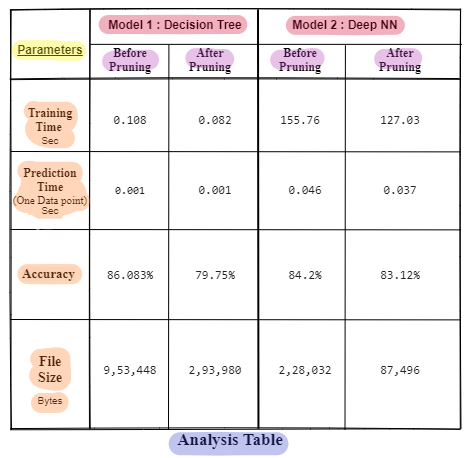

**Observations**


Pros
1.   After pruning, the training time always decreases in both the models.
2.   There is also a minute decrease in prediction time as i was only predicting one data point but when scaled up, it will create a pretty good difference.
3.   Major difference was seen in the decrease in file size of model which is huge.

Cons
* There is minute decrease in the accuracy also but it is not that huge and acceptable.



**References**
* Decision Tree :- <a href="https://www.datacamp.com/community/tutorials/decision-tree-classification-python">Link</a>
* Deep Neural Network :- <a href="https://medium.com/@souvik.paul01/pruning-in-deep-learning-models-1067a19acd89">Link1</a>
<a href="https://towardsdatascience.com/pruning-deep-neural-network-56cae1ec5505">Link2</a>
<a href="https://www.kaggle.com/nitinsss/pruning-a-neural-network/notebook#5.-Pruning-Strategy">Link3</a>
<a href="https://github.com/tensorflow/model-optimization/blob/master/tensorflow_model_optimization/g3doc/guide/pruning/pruning_with_keras.ipynb">Link4</a>



